# Importation des bibliothèques

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Télécharger le dataset PlantVillage

In [2]:
from google.colab import files
files.upload()  # Tu dois uploader le fichier kaggle.json ici

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nayaoussama","key":"fb187d9a33a1861e14be14c125763858"}'}

In [3]:
import os
import zipfile

# Crée le dossier .kaggle s'il n'existe pas
os.makedirs("/root/.kaggle", exist_ok=True)

# Déplace le fichier JSON vers ce dossier
!mv kaggle.json /root/.kaggle/

# Donne les permissions
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
# Télécharge le dataset (environ 800MB)
!kaggle datasets download -d emmarex/plantdisease

Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
 97% 635M/658M [00:01<00:00, 282MB/s]
100% 658M/658M [00:01<00:00, 375MB/s]


In [5]:
# Crée un dossier pour le dataset
os.makedirs("plant_data", exist_ok=True)

# Dézippe dans le dossier
with zipfile.ZipFile("plantdisease.zip", 'r') as zip_ref:
    zip_ref.extractall("plant_data")

In [6]:
# Lister récursivement le contenu extrait
import os

for root, dirs, files in os.walk("/content/plant_data"):
    level = root.replace("/content/plant_data", "").count(os.sep)
    indent = " " * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = " " * 2 * (level + 1)
    for f in files[:3]:  # affiche les 3 premiers fichiers pour ne pas tout surcharger
        print(f"{subindent}{f}")

plant_data/
  PlantVillage/
    Pepper__bell___Bacterial_spot/
      f7b2c446-72fe-4990-91cc-8764e819ad3b___JR_B.Spot 9004.JPG
      f7210adf-ebd1-44d7-9104-40244572d722___NREC_B.Spot 1807.JPG
      3fdbfdf3-ae31-49eb-8012-04cb4d3fc051___NREC_B.Spot 1973.JPG
    Tomato_Leaf_Mold/
      b814eaf5-3c86-4f5f-b05a-24db749c8f6b___Crnl_L.Mold 7011.JPG
      fbd446f3-6104-4ab8-8d3f-d4f69befecef___Crnl_L.Mold 7131.JPG
      2914fe18-387e-4d7f-8580-a0b530d7e727___Crnl_L.Mold 6777.JPG
    Pepper__bell___healthy/
      1a482d0c-d3a9-4e79-b412-f2288dc5067f___JR_HL 5852.JPG
      7d2d2203-b16e-4c88-9a96-0ff8e48358c3___JR_HL 7627.JPG
      3b79de24-6a09-4d8d-a49e-610438a4de32___JR_HL 8606.JPG
    Tomato_Early_blight/
      250df77c-cb57-4e85-9cf2-531033930030___RS_Erly.B 6477.JPG
      7ecb4521-70ac-4f49-ab74-2678cc4eab2a___RS_Erly.B 7690.JPG
      30901e71-e656-4e7e-b3ec-0f813c307b88___RS_Erly.B 9396.JPG
    Tomato_Septoria_leaf_spot/
      e26e353d-f3fa-4e2a-912e-8caabba7f900___Matt.S_CG 0744.JPG
 

# Préparation du dataset (split train/val/test)

In [7]:
import os
import shutil
from sklearn.model_selection import train_test_split

#  Création de dossier si nécessaire
def create_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

In [8]:
# input_folder = '/kaggle/input/plantvillage-dataset/color'
input_folder = '/content/plant_data/PlantVillage'
output_folder = './working/plantvillage-dataset-split'

train_dir = os.path.join(output_folder, 'train')
val_dir = os.path.join(output_folder, 'val')
test_dir = os.path.join(output_folder, 'test')

create_dir(train_dir)
create_dir(val_dir)
create_dir(test_dir)

In [9]:
for class_name in os.listdir(input_folder):
    class_dir = os.path.join(input_folder, class_name)
    if os.path.isdir(class_dir):
        images = os.listdir(class_dir)
        train_images, temp_images = train_test_split(images, test_size=0.3, random_state=1337)
        val_images, test_images = train_test_split(temp_images, test_size=(1/3), random_state=1337)

        create_dir(os.path.join(train_dir, class_name))
        create_dir(os.path.join(val_dir, class_name))
        create_dir(os.path.join(test_dir, class_name))

        for img in train_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(train_dir, class_name, img))
        for img in val_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(val_dir, class_name, img))
        for img in test_images:
            shutil.copy(os.path.join(class_dir, img), os.path.join(test_dir, class_name, img))

# Analyse du nombre d’images par dossier

In [10]:
# Chemin du dossier d'entraînement
train_path='/content/working/plantvillage-dataset-split/train'

In [11]:
# Nombre de classes
len(os.listdir(train_path))

15

In [12]:
# Nombre total d'images d'entraînement
all=0
data=os.listdir(train_path)
for d in data:
    all=all+len(os.listdir(train_path+'/'+d))

In [13]:
all

14441

In [14]:
all=0
data=os.listdir(train_path)
val_path='/content/working/plantvillage-dataset-split/val'
for d in data:
    all=all+len(os.listdir(val_path+'/'+d))

In [15]:
all

4128

In [16]:
all=0
data=os.listdir(train_path)
test_path='/content/working/plantvillage-dataset-split/test'
for d in data:
    all=all+len(os.listdir(test_path+'/'+d))

In [17]:
all

2070

# Analyse de la dimension moyenne des images

## Train

In [18]:
train_path

'/content/working/plantvillage-dataset-split/train'

In [19]:
cl=os.listdir(train_path)

In [20]:
cl

['Pepper__bell___Bacterial_spot',
 'Tomato_Leaf_Mold',
 'Pepper__bell___healthy',
 'Tomato_Early_blight',
 'Tomato_Septoria_leaf_spot',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_healthy',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Bacterial_spot',
 'Potato___Early_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Late_blight']

In [21]:
from matplotlib.image import imread
import os

dim1 = []
dim2 = []

# Extensions d'image communes (tu peux adapter si tu en as d'autres)
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

for x in cl:
    path = os.path.join(train_path, x)
    for fname in os.listdir(path):
        full_path = os.path.join(path, fname)

        # Vérifie que c'est bien un fichier image
        if os.path.isfile(full_path) and any(fname.lower().endswith(ext) for ext in image_extensions):
            try:
                img = imread(full_path)
                d1, d2, colors = img.shape
                dim1.append(d1)
                dim2.append(d2)
            except Exception as e:
                print(f"❌ Image ignorée : {full_path} | Raison : {e}")

In [22]:
np.mean(dim1)

np.float64(256.0)

In [23]:
np.mean(dim2)

np.float64(256.0)

In [24]:
val_path

'/content/working/plantvillage-dataset-split/val'

## Val

In [25]:
val_path

'/content/working/plantvillage-dataset-split/val'

In [26]:
cl=os.listdir(val_path)

In [27]:
cl

['Pepper__bell___Bacterial_spot',
 'Tomato_Leaf_Mold',
 'Pepper__bell___healthy',
 'Tomato_Early_blight',
 'Tomato_Septoria_leaf_spot',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_healthy',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Bacterial_spot',
 'Potato___Early_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Late_blight']

In [28]:
from matplotlib.image import imread
import os

dim1 = []
dim2 = []

# Extensions d'image communes (tu peux adapter si tu en as d'autres)
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

for x in cl:
    path = os.path.join(val_path, x)
    for fname in os.listdir(path):
        full_path = os.path.join(path, fname)

        # Vérifie que c'est bien un fichier image
        if os.path.isfile(full_path) and any(fname.lower().endswith(ext) for ext in image_extensions):
            try:
                img = imread(full_path)
                d1, d2, colors = img.shape
                dim1.append(d1)
                dim2.append(d2)
            except Exception as e:
                print(f"❌ Image ignorée : {full_path} | Raison : {e}")

In [29]:
np.mean(dim1)

np.float64(256.0)

In [30]:
np.mean(dim2)

np.float64(256.0)

## Test

In [31]:
test_path

'/content/working/plantvillage-dataset-split/test'

In [32]:
cl=os.listdir(test_path)

In [33]:
cl

['Pepper__bell___Bacterial_spot',
 'Tomato_Leaf_Mold',
 'Pepper__bell___healthy',
 'Tomato_Early_blight',
 'Tomato_Septoria_leaf_spot',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_healthy',
 'Tomato__Target_Spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Bacterial_spot',
 'Potato___Early_blight',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato_Late_blight']

In [34]:
from matplotlib.image import imread
import os

dim1 = []
dim2 = []

# Extensions d'image communes (tu peux adapter si tu en as d'autres)
image_extensions = ['.jpg', '.jpeg', '.png', '.bmp']

for x in cl:
    path = os.path.join(test_path, x)
    for fname in os.listdir(path):
        full_path = os.path.join(path, fname)

        # Vérifie que c'est bien un fichier image
        if os.path.isfile(full_path) and any(fname.lower().endswith(ext) for ext in image_extensions):
            try:
                img = imread(full_path)
                d1, d2, colors = img.shape
                dim1.append(d1)
                dim2.append(d2)
            except Exception as e:
                print(f"❌ Image ignorée : {full_path} | Raison : {e}")

In [35]:
np.mean(dim1)

np.float64(256.0)

In [36]:
np.mean(dim2)

np.float64(256.0)

# Préparation des générateurs d’images

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
image_gen =ImageDataGenerator(rotation_range=40,
                               width_shift_range=0.10,
                               height_shift_range=0.10,
                               rescale=1/255,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest'
                              )

In [39]:
val_test_gen=ImageDataGenerator(rescale=1/255)

In [40]:
 path=train_path+'/Pepper__bell___Bacterial_spot'

In [41]:
imgtest=imread(path+'/'+os.listdir(path)[0])

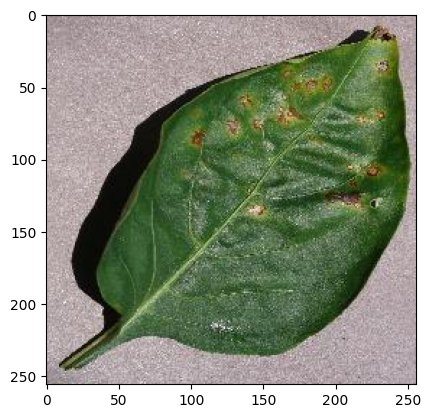

In [42]:
plt.imshow(imgtest)

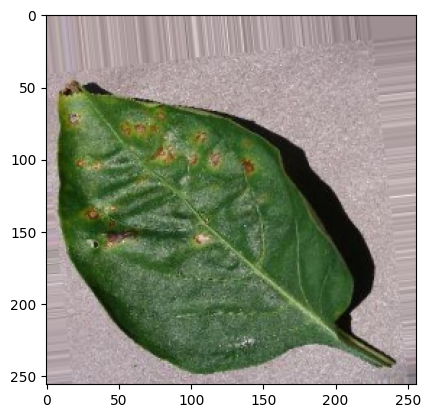

In [43]:
plt.imshow(image_gen.random_transform(imgtest))

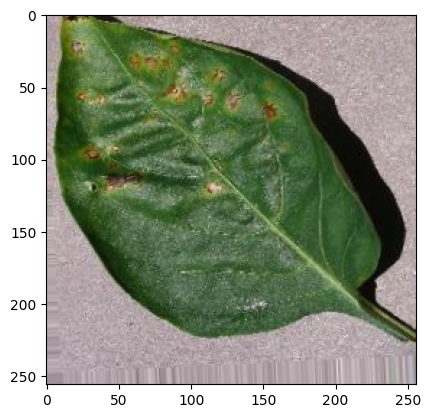

In [44]:
plt.imshow(image_gen.random_transform(imgtest))

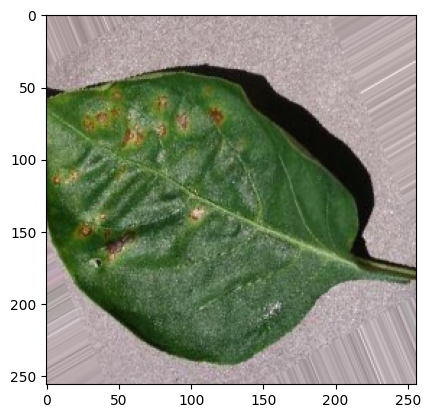

In [45]:
plt.imshow(image_gen.random_transform(imgtest))

# Préparation des DataGenerators et des poids de classes

In [46]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0, InceptionResNetV2, DenseNet201, EfficientNetB3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout,MaxPool2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input
from sklearn.utils import class_weight
from tensorflow.keras.optimizers import Adam

In [47]:
"""
Mais attention, ces générateurs ne font pas d’augmentation de données, ils se contentent de charger
les images et de les normaliser (parce qu’ils utilisent val_test_gen, qui est probablement défini
comme ça plus haut 👇) :

Il crée un pipeline qui :
1. Charge les images depuis un dossier organisé en sous-dossiers par classe.
2. Redimensionne les images à la taille demandée (target_size).
3. Applique un prétraitement (ici : division des pixels par 255).
4. Les livre en batchs prêtes pour l'entraînement/évaluation.
"""

val_data_gen = val_test_gen.flow_from_directory(
    val_path,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

test_data_gen = val_test_gen.flow_from_directory(
    test_path,
    # target_size=(150, 150),
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

Found 4128 images belonging to 15 classes.
Found 2070 images belonging to 15 classes.


In [48]:
train_image_gen = image_gen.flow_from_directory(
    train_path,
    target_size=(224,224),
    color_mode='rgb',
    batch_size=32,
    class_mode='categorical'
)

Found 14440 images belonging to 15 classes.


In [49]:
# train_image_gen.class_indices

In [50]:
# Les classes sont identiques et dans le même ordre pour train, val, et test.

print("Train classes:", train_image_gen.class_indices)
print("Val classes:  ", val_data_gen.class_indices)
print("Test classes: ", test_data_gen.class_indices)

Train classes: {'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato_Bacterial_spot': 5, 'Tomato_Early_blight': 6, 'Tomato_Late_blight': 7, 'Tomato_Leaf_Mold': 8, 'Tomato_Septoria_leaf_spot': 9, 'Tomato_Spider_mites_Two_spotted_spider_mite': 10, 'Tomato__Target_Spot': 11, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12, 'Tomato__Tomato_mosaic_virus': 13, 'Tomato_healthy': 14}
Val classes:   {'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'Potato___Early_blight': 2, 'Potato___Late_blight': 3, 'Potato___healthy': 4, 'Tomato_Bacterial_spot': 5, 'Tomato_Early_blight': 6, 'Tomato_Late_blight': 7, 'Tomato_Leaf_Mold': 8, 'Tomato_Septoria_leaf_spot': 9, 'Tomato_Spider_mites_Two_spotted_spider_mite': 10, 'Tomato__Target_Spot': 11, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12, 'Tomato__Tomato_mosaic_virus': 13, 'Tomato_healthy': 14}
Test classes:  {'Pepper__bell___Bacterial_spot': 0, 'P

In [51]:
"""
Ce code calcule les poids de classe (class weights) pour gérer un dataset déséquilibré, c’est-à-dire où certaines classes ont beaucoup plus d’images que d’autres (par exemple : 500 tomates malades vs 30 poivrons sains 🌶️).

🎯 Objectif :
Donner plus d'importance aux classes minoritaires pendant l'entraînement du modèle.
"""

class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_image_gen.classes),
    y=train_image_gen.classes
)

In [52]:
class_weights = dict(enumerate(class_weights))
class_weights

{0: np.float64(1.3811573409851745),
 1: np.float64(0.9310122501611864),
 2: np.float64(1.3752380952380951),
 3: np.float64(1.3752380952380951),
 4: np.float64(9.081761006289309),
 5: np.float64(0.6469534050179212),
 6: np.float64(1.3752380952380951),
 7: np.float64(0.720558882235529),
 8: np.float64(1.4454454454454455),
 9: np.float64(0.77697067527576),
 10: np.float64(0.8206876953680022),
 11: np.float64(0.9803122878479293),
 12: np.float64(0.4288047512991834),
 13: np.float64(3.6883780332056193),
 14: np.float64(0.8649296196466008)}

# Model EfficientNetB0

## Construction du modèle EfficientNetB0 avec des couches personnalisées

Le modèle EfficientNetB0 est un modèle de réseau de neurones convolutif (CNN)pré-entraîné, développé par Google, qui est devenu très populaire grâce à son excellent rapport performance/taille.
En d'autres mots : il est rapide, léger, et très efficace 💪🧠





In [ ]:
cl = os.listdir(train_path)
len(cl)  # → 15

15

In [ ]:
from tensorflow.keras import layers, models, applications
import tensorflow as tf

input_shape = (224, 224, 3)
base_model = applications.EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)

x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(base_model.output)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(2048, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(15, activation='softmax')(x)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = models.Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 10,190,386 (38.87 MB)

 Trainable params: 10,147,595 (38.71 MB)

 Non-trainable params: 42,791 (167.16 KB)

## Compilation du modèle

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=5e-5), loss='categorical_crossentropy', metrics=['accuracy'])

## Entraînement du modèle avec EarlyStopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

history = model.fit(
    train_image_gen,
    epochs=50,
    validation_data=val_data_gen,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 315s 523ms/step - accuracy: 0.2272 - loss: 13.6796 - val_accuracy: 0.0817 - val_loss: 10.7845 - learning_rate: 5.0000e-05
Epoch 2/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 187s 412ms/step - accuracy: 0.8533 - loss: 6.7987 - val_accuracy: 0.1994 - val_loss: 7.1971 - learning_rate: 5.0000e-05
Epoch 3/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 189s 418ms/step - accuracy: 0.9324 - loss: 4.0602 - val_accuracy: 0.2883 - val_loss: 5.2102 - learning_rate: 5.0000e-05
Epoch 4/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 203s 419ms/step - accuracy: 0.9543 - loss: 2.4417 - val_accuracy: 0.2481 - val_loss: 5.2890 - learning_rate: 5.0000e-05
Epoch 5/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 189s 418ms/step - accuracy: 0.9638 - loss: 1.4598 - val_accuracy: 0.5202 - val_loss: 2.4527 - learning_rate: 5.0000e-05
Epoch 6/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 204s 421ms/step - accuracy: 0.9655 - loss: 0.8905 - val_accuracy: 0.4429 - val_loss: 3.2234 - learning_rate: 5.0000e-05
Epoch 7/50
452/452 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras import layers, models, regularizers
# from tensorflow.keras.models import Model

# # Charger EfficientNetB0 sans la couche de classification (include_top=False)
# base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# # # Geler toutes les couches du modèle pré-entraîné
# # for layer in base_model.layers:
# #     layer.trainable = False

# # Ajouter les nouvelles couches personnalisées
# x = layers.GlobalAveragePooling2D()(base_model.output)
# x = layers.Dense(512, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(128, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# output = layers.Dense(train_image_gen.num_classes, activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=output)

# # Défreeze seulement les 30 dernières couches
# for layer in base_model.layers[:-30]:
#     layer.trainable = False

# # Compiler
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# # Callbacks
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Entraîner (Transfer Learning seulement sur les nouvelles couches)
# history = model.fit(
#     train_image_gen,
#     epochs=30,
#     validation_data=val_data_gen,
#     class_weight=class_weights,
#     callbacks=[early_stop]
# )

## Affichage des courbes d’apprentissage

<Axes: >

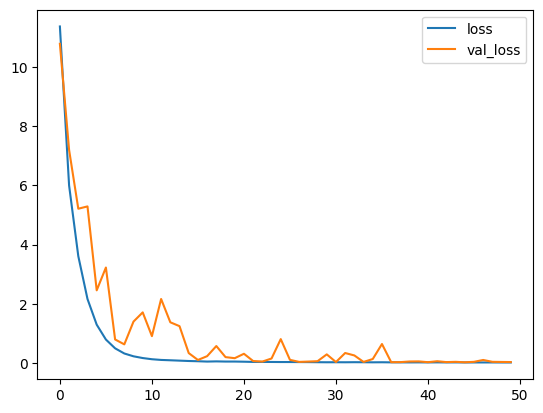

In [ ]:
metric=pd.DataFrame(history.history)
metric[['loss','val_loss']].plot()

<Axes: >

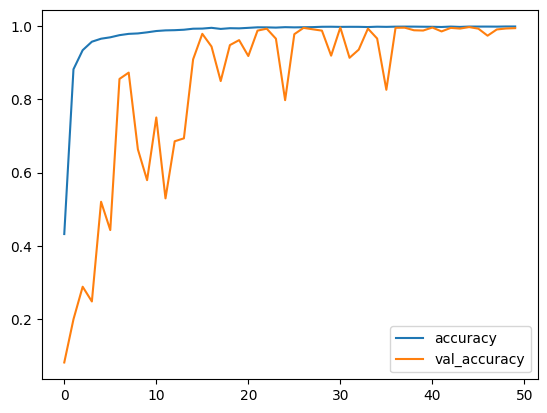

In [ ]:
metric[['accuracy','val_accuracy']].plot()

In [ ]:
#prediction=model.predict(test_data_gen)

In [ ]:
#from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#cm = confusion_matrix(test_data_gen.classes, prediction)

#plt.figure(figsize=(38, 38))

#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
#plt.xlabel('Predicted Class')
#plt.ylabel('True Class')
#plt.show()

In [ ]:
#print(classification_report(test_data_gen.classes,prediction))

## Save le Model

In [ ]:
from tensorflow.keras.models import load_model
model.save('model_efficientnetb0.h5')

# Model MobileNet

## Construction du modèle MobileNet avec des couches personnalisées

Le modèle EfficientNetB0 est un modèle de réseau de neurones convolutif (CNN)pré-entraîné, développé par Google, qui est devenu très populaire grâce à son excellent rapport performance/taille.
En d'autres mots : il est rapide, léger, et très efficace 💪🧠





In [53]:
cl = os.listdir(train_path)
len(cl)  # → 15

15

In [54]:
from tensorflow.keras import layers, models, applications
import tensorflow as tf

base_model = applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(15, activation='softmax')(x)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [55]:
model = models.Model(inputs=base_model.input, outputs=output)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 4,102,223 (15.65 MB)

 Trainable params: 1,844,239 (7.04 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Compilation du modèle

In [57]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

## Entraînement du modèle avec EarlyStopping

In [58]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

history = model.fit(
    train_image_gen,
    epochs=50,
    validation_data=val_data_gen,
    class_weight=class_weights,
    callbacks=[early_stop, reduce_lr]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 194s 402ms/step - accuracy: 0.4630 - loss: 1.7392 - val_accuracy: 0.7575 - val_loss: 0.6733 - learning_rate: 0.0010
Epoch 2/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 172s 380ms/step - accuracy: 0.7412 - loss: 0.7769 - val_accuracy: 0.8178 - val_loss: 0.5353 - learning_rate: 0.0010
Epoch 3/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 178s 394ms/step - accuracy: 0.7539 - loss: 0.7348 - val_accuracy: 0.8428 - val_loss: 0.4872 - learning_rate: 0.0010
Epoch 4/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 177s 392ms/step - accuracy: 0.7797 - loss: 0.6459 - val_accuracy: 0.8353 - val_loss: 0.5008 - learning_rate: 0.0010
Epoch 5/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 173s 382ms/step - accuracy: 0.7855 - loss: 0.6309 - val_accuracy: 0.8295 - val_loss: 0.4941 - learning_rate: 0.0010
Epoch 6/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 173s 383ms/step - accuracy: 0.8066 - loss: 0.5857 - val_accuracy: 0.8396 - val_loss: 0.4834 - learning_rate: 0.0010
Epoch 7/50
452/452 ━━━━━━━━━━━━━━━━━━━━ 174s 384ms/step - accura

In [ ]:
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras import layers, models, regularizers
# from tensorflow.keras.models import Model

# # Charger EfficientNetB0 sans la couche de classification (include_top=False)
# base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

# # # Geler toutes les couches du modèle pré-entraîné
# # for layer in base_model.layers:
# #     layer.trainable = False

# # Ajouter les nouvelles couches personnalisées
# x = layers.GlobalAveragePooling2D()(base_model.output)
# x = layers.Dense(512, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(128, activation='relu')(x)
# x = layers.Dropout(0.5)(x)
# output = layers.Dense(train_image_gen.num_classes, activation='softmax')(x)

# model = Model(inputs=base_model.input, outputs=output)

# # Défreeze seulement les 30 dernières couches
# for layer in base_model.layers[:-30]:
#     layer.trainable = False

# # Compiler
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# # Callbacks
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Entraîner (Transfer Learning seulement sur les nouvelles couches)
# history = model.fit(
#     train_image_gen,
#     epochs=30,
#     validation_data=val_data_gen,
#     class_weight=class_weights,
#     callbacks=[early_stop]
# )

## Affichage des courbes d’apprentissage

<Axes: >

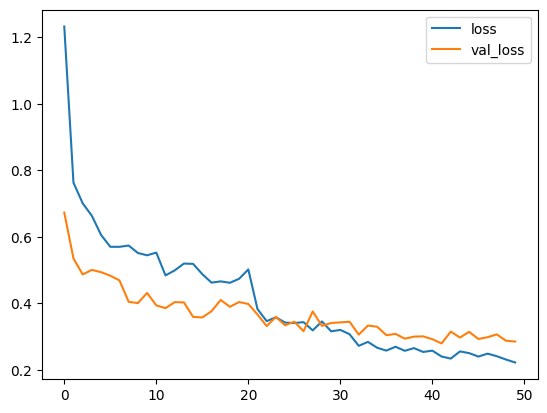

In [59]:
metric=pd.DataFrame(history.history)
metric[['loss','val_loss']].plot()

<Axes: >

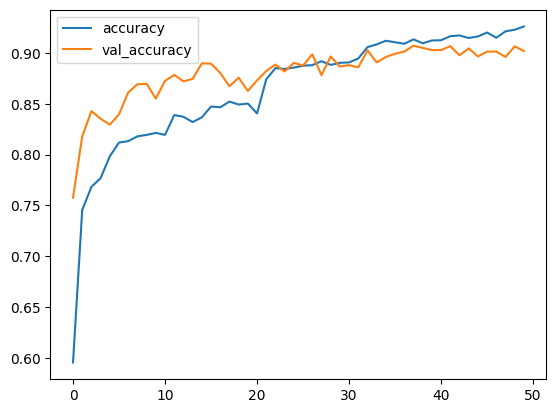

In [60]:
metric[['accuracy','val_accuracy']].plot()

In [ ]:
#prediction=model.predict(test_data_gen)

In [ ]:
#from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
#cm = confusion_matrix(test_data_gen.classes, prediction)

#plt.figure(figsize=(38, 38))

#sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
#plt.xlabel('Predicted Class')
#plt.ylabel('True Class')
#plt.show()

In [ ]:
#print(classification_report(test_data_gen.classes,prediction))

## Save le Model

In [61]:
from tensorflow.keras.models import load_model
model.save('model_MobileNet.h5')